In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
model = keras.models.load_model('CNN_Model64')

In [3]:
train_dir = './data/asl_alphabet_train'
test_dir = './data/asl_alphabet_test'

In [4]:
# load testing data and image file names
def load_test_data():
    imageslist = []
    filenames = []
    size = (64,64)

    for imgfile in os.listdir(test_dir):
        img = cv2.imread(f'{test_dir}/{imgfile}')
        img = cv2.resize(img, size)
        imageslist.append(img)
        filenames.append(imgfile)
        
    imageslist = np.array(imageslist)
    # normalize values
    imageslist = imageslist.astype('float32')/255.0
    return imageslist, filenames

test_imgs, test_img_names = load_test_data()

In [5]:
# make predictions on each image and store it
predictions = [model.predict_classes(image.reshape(1,64,64,3))[0] for image in test_imgs]

C:\Users\jiango\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [6]:
predictions, test_img_names

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  28,
  13,
  14,
  15,
  16,
  17,
  26,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 ['A_test.jpg',
  'B_test.jpg',
  'C_test.jpg',
  'D_test.jpg',
  'E_test.jpg',
  'F_test.jpg',
  'G_test.jpg',
  'H_test.jpg',
  'I_test.jpg',
  'J_test.jpg',
  'K_test.jpg',
  'L_test.jpg',
  'M_test.jpg',
  'nothing_test.jpg',
  'N_test.jpg',
  'O_test.jpg',
  'P_test.jpg',
  'Q_test.jpg',
  'R_test.jpg',
  'space_test.jpg',
  'S_test.jpg',
  'T_test.jpg',
  'U_test.jpg',
  'V_test.jpg',
  'W_test.jpg',
  'X_test.jpg',
  'Y_test.jpg',
  'Z_test.jpg'])

In [7]:
# dict for mapping an integer for each class/label
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

In [8]:
# match predicted values (ints) with actual label (string)
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

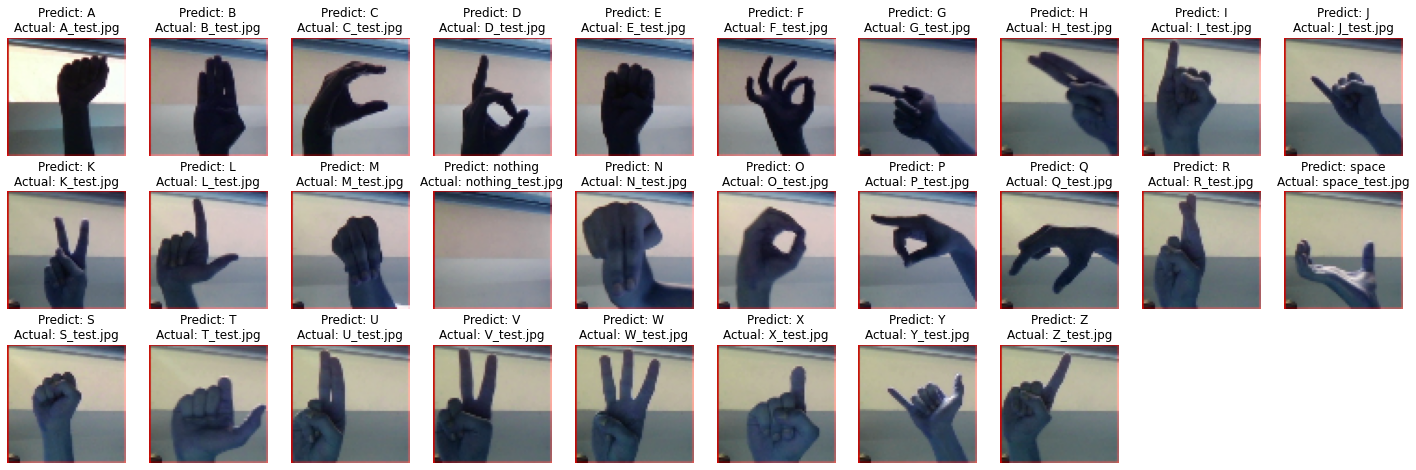

In [9]:
# plot each image with its predicted label and actual filename/label
predfigure = plt.figure(figsize = (25,8))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(f'Predict: {predictions_label}\nActual: {label}')
    return

image_index = 0
row = 3
col = 10
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_imgs[image_index], test_img_names[image_index], 
    predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()